<a href="https://colab.research.google.com/github/nathamon24/image-processing/blob/main/Activity/Activity%237/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

7.1 Effects of interpolation techniques in Image Resizing

In [35]:
def K_Display(offset, img, Reduce_factors,inter_methods):
  for i in range(3):
    # print(img.shape[1],img.shape[0])
    width = int(img.shape[1] * 1/ Reduce_factors[i+offset] )
    height = int(img.shape[0] * 1/ Reduce_factors[i+offset])
    dim = (width, height)
    # print(dim)

    #Display results using each scale_factors & interpolation methods
    nearest = cv2.resize( img, dim, inter_methods[0] )
    linear = cv2.resize( img, dim, inter_methods[1] )
    cubic = cv2.resize( img, dim, inter_methods[2] )
    area = cv2.resize( img, dim, inter_methods[3] )

    # Display Result image
    axarr[i + offset][0].set_title('INTER_NEAREST')
    axarr[i + offset][1].set_title('INTER_LINEAR')
    axarr[i + offset][2].set_title('INTER_CUBIC')
    axarr[i + offset][3].set_title('INTER_AREA')
    axarr[i + offset][0].imshow(nearest.astype(np.uint8))
    axarr[i + offset][1].imshow(linear.astype(np.uint8))
    axarr[i + offset][2].imshow(cubic.astype(np.uint8))
    axarr[i + offset][3].imshow(area.astype(np.uint8))

<Figure size 432x288 with 0 Axes>

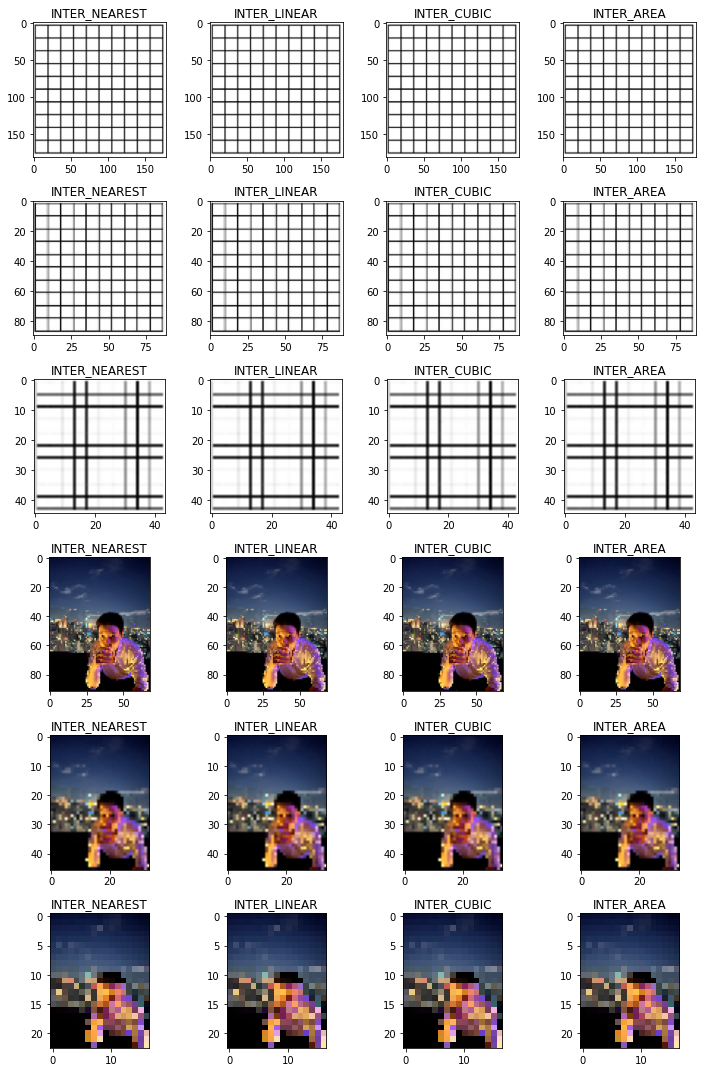

In [36]:
# Read image file
grid_img = cv2.imread("/content/drive/MyDrive/Work/CE/Colab/Lab7/Grid_Image.JPG")
k_img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/Work/CE/Colab/Lab7/K.jpg"), cv2.COLOR_BGR2RGB)

# Define resize factor
Reduce_factors = [2, 4, 8, 16, 32, 64] # อย่างน้อย 3 ค่า 

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST,cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]

plt.figure()
f, axarr = plt.subplots(6,4, figsize=(10,15)) 

K_Display(0,grid_img,Reduce_factors,inter_methods)
K_Display(3,k_img,Reduce_factors,inter_methods)
f.tight_layout()

7.2 Image Augmentation using KERAS ImageDataGenerator

In [45]:
def KP_Video(img_array, name, fps):
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')
  writer = cv2.VideoWriter(name+".mp4", fourcc, fps, img_array[0].shape[:2][::-1])
  for frame in range(len(img_array)):
    writer.write(img_array[frame])
  writer.release()

In [48]:
# convert to numpy array
data = np.asarray(cv2.cvtColor(k_img, cv2.COLOR_BGR2RGB))
# expand dimension to one sample
samples = np.expand_dims(data, 0)

# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

# Define ImageDataGenerator with parameters
Npic = 20
img_array = []
for m in fill_method:
  datagen = ImageDataGenerator( rotation_range = 45,
                                width_shift_range = 0, 
                                height_shift_range = 0, 
                                shear_range = 0, 
                                zoom_range = 0, 
                                horizontal_flip = False, 
                                fill_mode = m)
  # Creates our batch of one image
  pic = datagen.flow(samples, batch_size =1,shuffle=False)

  # Random generate transformed images and write to a video file
  for i in range(1, Npic):
    batch = pic.next()
    im_result = batch[0].astype('uint8')
    img_array.append(im_result)
  
name = "Lab7.2"
fps = 2
KP_Video(img_array, name, fps)